In [2]:
import sympy as sp

In [3]:
x = sp.Symbol('x') #Definimos a x & y como simbolos algebraicos
y = sp.Symbol('y')

In [4]:
(x+y)**2 #genero la operación de un binomio al cuadrado

(x + y)**2

In [5]:
((x+y)**2).expand() #comando para expandir de forma algebraico el resultado del binomio

x**2 + 2*x*y + y**2

In [6]:
((x+y)**2).subs(x, 1) #comando para evaluar en particular un simbolo algebraico, en este caso x=1

(y + 1)**2

In [7]:
1/( (x+2)*(x+1) ) #Fraccion con denominador como factor

1/((x + 1)*(x + 2))

In [8]:
sp.apart(1/( (x+2)*(x+1) ), x)

-1/(x + 2) + 1/(x + 1)

### **Documentación**
La función `sp.apart` en SymPy se utiliza para descomponer una fracción racional en fracciones parciales.


In [9]:
(x+1)/(x-1)

(x + 1)/(x - 1)

In [10]:
sp.apart((x+1)/(x-1), x) #Genera la misma función que el anterior. Como no se puede escrbiir en forma parcial
                        # desarrolla la division correspondiente entre x+1/x-1

1 + 2/(x - 1)

In [11]:
sp.apart((36*x-1)/(x**2 + 2*x + 5), x)

(36*x - 1)/(x**2 + 2*x + 5)

In [13]:
sp.factor(7*x**2 + 2*x + 5*x, x) # Comando utilizado para generar un factor comun en los terminos algebraicos
                                # IMPORTANTE: si es que los hay!!!. 

7*x*(x + 1)

In [35]:
x=sp.Symbol('x', complex=True)
sp.simplify(x**2 + 2*x + 5)

x**2 + 2*x + 5

In [39]:
prueba=sp.apart((36*x-4)/((x+1)**2 + 4), x)

In [40]:
prueba

4*(9*x - 1)/(x**2 + 2*x + 5)

In [41]:
sp.factor(prueba,x)

4*(9*x - 1)/(x**2 + 2*x + 5)

In [23]:
prueba1= (x**2 - 7*x + 24)/((x-1)*(x-2)*(x-4))

In [24]:
prueba1

(x**2 - 7*x + 24)/((x - 4)*(x - 2)*(x - 1))

In [25]:
sp.apart(prueba1, x) # Aqui si podemos generar la factorizacion correspondiente

6/(x - 1) - 7/(x - 2) + 2/(x - 4)

## Transformada de Laplace

In [26]:
t, s = sp.symbols("t, s") #Definimos los simobolos

In [27]:
a = sp.symbols("a", real=True, positive=True) # hago que a sea tanto positivo como numero real

In [28]:
fun = sp.exp(-a*t) #funcion e^-at
#fun=t**4
#fun = sp.sin(a*t) #funcion sin(at)

In [33]:
Fs = sp.laplace_transform(fun, t, s, noconds=True)

In [34]:
Fs

a/(a**2 + s**2)

### **Documentación**

El código `Fs = sp.laplace_transform(fun, t, s, noconds=True)` en SymPy se utiliza para calcular la **transformada de Laplace** de una función en términos de la variable simbólica `t`, transformándola en la variable simbólica `s`.

- **`sp.laplace_transform`**: Es la función de SymPy que calcula la transformada de Laplace de una función dada.

- **`fun`**: La función en términos de `t` de la cual deseas calcular la transformada de Laplace.

- **`t`**: La variable independiente original (normalmente el tiempo).

- **`s`**: La variable de la imagen o frecuencia (a la que se convierte `t` en la transformada de Laplace).

- **`noconds=True`**: Al establecer `noconds=True`, le estás diciendo a SymPy que devuelva solo la expresión transformada, sin condiciones adicionales de convergencia. Si estableces `noconds=False` (o lo omites), SymPy también devolverá las condiciones bajo las cuales la transformada es válida (por ejemplo, restricciones en `s`).

# Función escalón

In [42]:
t = sp.Symbol('t')

In [43]:
u = sp.Heaviside(t)
ft = u - u.subs(t,t-2)

### **Documentación**
Los códigos `u = sp.Heaviside(t)` y `ft = u - u.subs(t, t-2)` en SymPy se usan para trabajar con la **función escalón de Heaviside**.

1. **`u = sp.Heaviside(t)`**: 
   - Este código define `u` como la **función de Heaviside** en la variable `t`.

   - La función de Heaviside, `H(t)`, es una función escalón que vale `0` para `t < 0` y `1` para `t >= 0`.

   - En SymPy, `sp.Heaviside(t)` representa esta función.

2. **`ft = u - u.subs(t, t-2)`**:
   - Aquí se define `ft` como una combinación de dos funciones de Heaviside: `u` y `u.subs(t, t-2)`.

   - `u.subs(t, t-2)` es la función de Heaviside trasladada en el tiempo, donde `t` se reemplaza por `t-2`. Esto significa que la función Heaviside se activa en `t = 2` en lugar de `t = 0`.

   - La expresión `ft = u - u.subs(t, t-2)` representa una función que "se activa" en `t = 0` y "se apaga" en `t = 2`. En otras palabras, `ft` es una función rectangular que vale `1` entre `t = 0` y `t = 2`, y `0` fuera de ese intervalo.

In [44]:
ft

Heaviside(t) - Heaviside(t - 2)

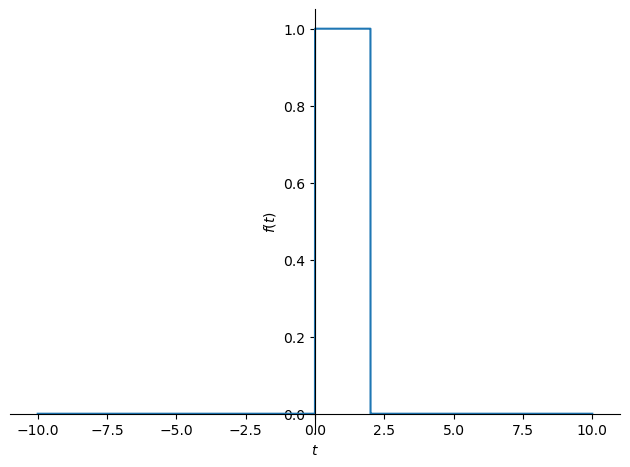

In [45]:
c1=sp.plotting.plot(ft) #grafica la funcion de heaviside anterior.

In [47]:
d = sp.DiracDelta(t) #La funcion delta de dirac

In [48]:
d

DiracDelta(t)

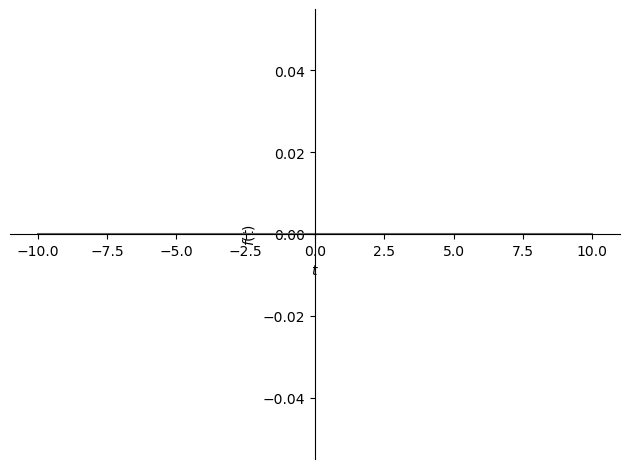

In [49]:
c2=sp.plotting.plot(d)

### **Documentación**
Como la función **delta de Dirac** en realidad es una **función de distribución** y no una función tradicional. Por lo tanto, su valor en el eje \( y \) es teóricamente infinito en \( t = 0 \) y cero en todos los demás puntos. Debido a esta naturaleza, SymPy y muchas otras bibliotecas no pueden graficar la delta de Dirac directamente, ya que no hay un valor numérico definido que se pueda representar en el gráfico.

Para visualizar la delta de Dirac en un gráfico, se suele utilizar una **aproximación** en lugar de la función exacta. Una forma común de hacer esto es graficar un pico muy alto en \( t = 0 \) que represente visualmente la delta de Dirac. Esto se puede lograr mediante el uso de una función gaussiana o una función con forma de pico que sea alta y estrecha en \( t = 0 \).

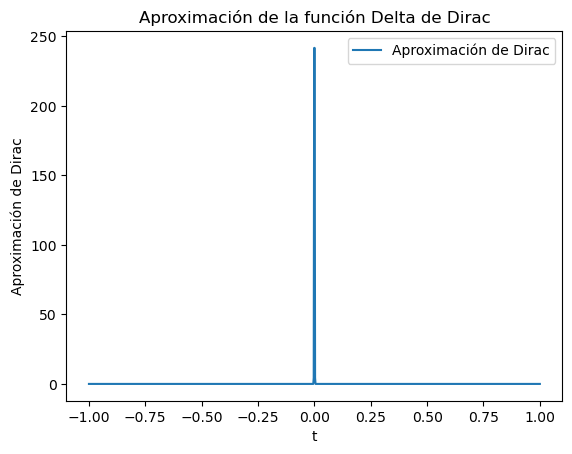

In [51]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Crear una función que aproxima la delta de Dirac
def dirac_approx(t, epsilon=0.001):
    return np.exp(-t**2 / (2 * epsilon**2)) / (epsilon * np.sqrt(2 * np.pi))

# Rango de valores de t para graficar
t_vals = np.linspace(-1, 1, 1000)
d_vals = dirac_approx(t_vals)

# Graficar la aproximación
plt.plot(t_vals, d_vals, label="Aproximación de Dirac")
plt.xlabel("t")
plt.ylabel("Aproximación de Dirac")
plt.title("Aproximación de la función Delta de Dirac")
plt.legend()
plt.show()

### Explicación del Código
- **`dirac_approx(t, epsilon=0.1)`**: Esta función define una aproximación gaussiana para la delta de Dirac, donde `epsilon` controla qué tan estrecha y alta es la función. Un valor más pequeño de `epsilon` hace que la función sea más alta y más concentrada alrededor de \( t = 0 \).
- **`t_vals`**: Define un rango de valores de `t` alrededor de cero para observar la función.
- **`plt.plot`**: Grafica la aproximación de la delta de Dirac en el rango definido.

Este gráfico mostrará un pico alto y estrecho en \( t = 0 \), que representa visualmente la función delta de Dirac.

In [ ]:
gt = sp.exp(-2*t)*u + sp.exp(-t)*sp.cos(3*t)*u

In [ ]:
c3=sp.plotting.plot(gt)

In [ ]:
ht = d - 3*d.subs(t,t-2) + 2*d.subs(t,t-3)

In [ ]:
ht

In [ ]:
c4=sp.plotting.plot(ht)